<center>

# **PAPER CODE: Machine Learning and Feature Ranking for Impact FALL DETECTION EVENT USING MULTISENSOR DATA**
    
</center>

<span style="color:red; text-decoration: underline;">Note:</span> The data used for this particular sample code is the dataset of subject 1. To allign the result with the result in the paper you should use the all the data that correspond to the dataset of 5 subjects with the same code


In [1]:
import numpy as np
import torch
torch.cuda.get_device_name(0)
np.random.seed(42)

# Switch to CPU when GPU is not available.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
import torch

torch.cuda.is_available()

True

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import f_classif # Chi-Squared test belongs the class of filter methods

In [3]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC


import torch
import torch.nn as nn
from torch.nn import functional as F
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import DataLoader, random_split, TensorDataset
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import pandas as pd


# I- DATA LOADING

In [5]:
# Load the data
data = pd.read_csv("SUBJECT1.csv")
X = data.drop(['LABEL'] ,axis=1)
y = data['LABEL']

## II-SCALING AND NORMALIZATION

In [6]:
import pandas as pd
import numpy as np

                    #################################
                             #SCALLING & NORMALIZATION                               
                    #################################
         
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Fit the scaler on the training data and transform both the training and testing data
scaler = StandardScaler()
scaler.fit(X_train)
train_X = scaler.transform(X_train)
test_X = scaler.transform( X_test)
    
# Now you can use X_train_scaled and X_test_scaled to train and test your model, respectively

In [9]:
# Train_X scaled
print(train_X)

      Ank_ACCX  Ank_ACCY  Ank_ACCZ  Ank_VELX  Ank_VELY  Ank_VELZ  Ank_LUMX  \
0    -1.801437  0.174389  0.219857 -0.446449 -0.386931  0.113610 -0.682141   
1    -1.798935  0.162259  0.145475 -0.019286 -0.114407 -0.101751 -0.682141   
2     0.053021  1.141180  0.717992  0.027398 -0.098050 -0.011487 -0.682141   
3    -0.219767  1.024728  1.042568 -0.276985 -0.346039 -0.007616 -0.682141   
4     1.191723 -0.662606 -0.061893 -6.712079  0.084512 -0.510540 -0.682141   
...        ...       ...       ...       ...       ...       ...       ...   
2265 -0.157201  1.126623  0.235635 -0.015854 -0.054476 -0.025678 -0.682141   
2266  0.295777 -1.212112  0.483576  0.236654 -0.065381  0.022035 -0.682141   
2267 -1.783919  0.238680  0.251413 -0.149015 -0.019036  0.029775 -0.682141   
2268  0.358343  1.187275  0.368621  0.001446 -0.092597 -0.014067 -0.682141   
2269  0.285766 -1.220603  0.470052 -0.311558 -0.098050 -0.014067 -0.682141   

      RightPocketACCX  RightPocketACCY  RightPocketACCZ  ...  N

# III- FEATURE SELECTIONS

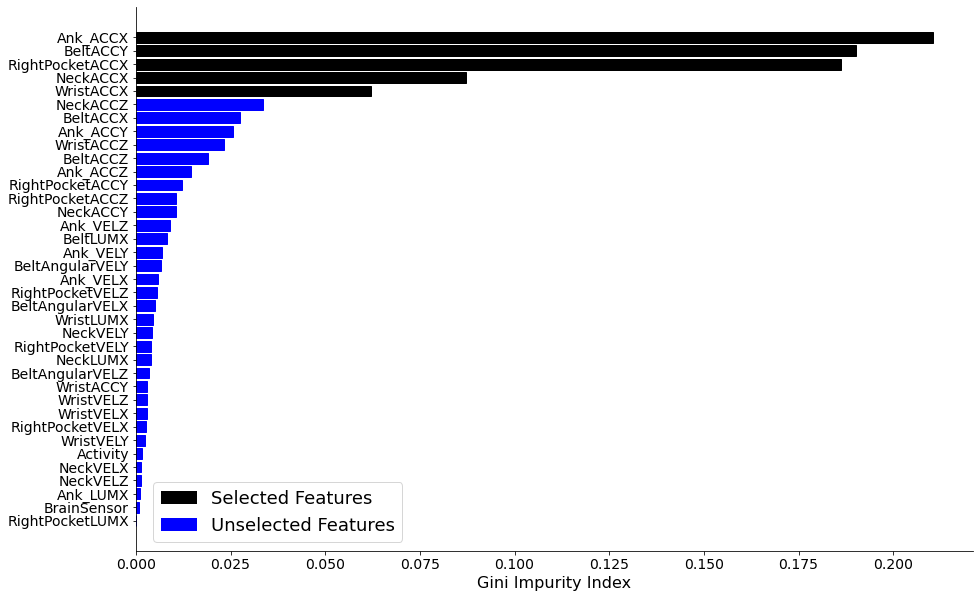

['Ank_ACCX', 'BeltACCY', 'RightPocketACCX', 'NeckACCX', 'WristACCX']


In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Convert train_X to a DataFrame
train_X = pd.DataFrame(train_X, columns=X_train.columns)

# Feature selection using Random Forest Classifier on the train set
rfc = RandomForestClassifier(n_estimators=1000, random_state=4)
rfc.fit(train_X, y_train)
feature_scores = pd.DataFrame({'rfc': rfc.feature_importances_}, index=train_X.columns)
feature_scores.sort_values('rfc', ascending=False, inplace=True)
top_n = 5
selected_features = feature_scores.iloc[:top_n].index.tolist()


index = np.arange(len(feature_scores))
fig, ax = plt.subplots(figsize=(15, 10))

# Plot all features
all_features = ax.barh(index, feature_scores['rfc'][::-1], color='blue', label='Unselected Features')

# Plot the top selected features with a different color
highlighted_colors = ['black' if feature in selected_features else 'blue' for feature in feature_scores.index[::-1]]
for i, bar in enumerate(all_features):
    bar.set_color(highlighted_colors[i])

# ax.set(yticks=index, yticklabels=feature_scores.index[::-1])
ax.set(yticks=index, yticklabels=feature_scores.index[::-1])
ax.set_xlabel('Gini Impurity Index', fontsize=16)  # Add this line to set the x-axis label

# Add legend for selected and unselected features
selected_patch = plt.Rectangle((0, 0), 1, 1, fc='black')
unselected_patch = plt.Rectangle((0, 0), 1, 1, fc='blue')
legend = ax.legend([selected_patch, unselected_patch], ['Selected Features', 'Unselected Features'], fontsize=18, loc='lower left', bbox_to_anchor=(0.01, -0), ncol=1)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


# Increase the size of x-axis and y-axis
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('figure4.pdf', format='pdf', dpi=1200, bbox_extra_artists=(legend,), bbox_inches='tight')

plt.show()

# Subset the train and test sets to selected features
train_X_selected = train_X[selected_features]
# X_test_selected = X_test[selected_features]  # The training and testing datasets contain the same set of features for consistent evaluation
print(selected_features)

# print(X_train_selected.shape, X_test_selected.shape, X_val.shape)


In [10]:
from sklearn.ensemble import RandomForestClassifier

# Create and fit the Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=1000, oob_score=True, random_state=4)
rfc.fit(train_X, y_train)

# Calculate the OOB Error Estimate
oob_error = 1 - rfc.oob_score_

print("Out-of-bag (OOB) Error Estimate: {:.4f}".format(oob_error))


Out-of-bag (OOB) Error Estimate: 0.0013


In [300]:
train_X.shape

(11132, 37)

# RF

In [12]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

# Load the dataset from the specified path
data_path = r"C:\Users\ytkoffi\Desktop\METHOD2SMV\POSEDATA_SMV\S5\data51.csv"
data = pd.read_csv(data_path)

# Assuming the last column is the label
X = data.iloc[:, :-1]  # Features (all columns except the last one)
y = data.iloc[:, -1]   # Label (the last column)

# Split the dataset into training + validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StratifiedKFold object
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Define the model and parameters for GridSearch
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=skf, scoring='accuracy', n_jobs=-1)

# Initialize lists to hold the accuracy and F1 scores
train_accuracies = []
val_accuracies = []
train_f1_scores = []
val_f1_scores = []

# Perform Stratified K-Fold Cross Validation with GridSearch
for fold, (train_index, val_index) in enumerate(skf.split(X_train_val, y_train_val)):
    X_train, X_val = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
    y_train, y_val = y_train_val.iloc[train_index], y_train_val.iloc[val_index]

    # Fit the GridSearchCV object
    grid_search.fit(X_train, y_train)
    
    # Best model
    best_rf = grid_search.best_estimator_

    # Calculate training accuracy and F1 score
    y_train_pred = best_rf.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    train_accuracies.append(train_accuracy)
    train_f1_scores.append(train_f1)
    
    # Make predictions and calculate validation accuracy and F1 score
    y_val_pred = best_rf.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')
    val_accuracies.append(val_accuracy)
    val_f1_scores.append(val_f1)
    
    # Print training and validation accuracy and F1 score for the current fold
    print(f'Fold {fold + 1} Training Accuracy: {train_accuracy:.4f}, F1 Score: {train_f1:.4f}')
    print(f'Fold {fold + 1} Validation Accuracy: {val_accuracy:.4f}, F1 Score: {val_f1:.4f}')

# Calculate average accuracies and F1 scores
average_train_accuracy = np.mean(train_accuracies)
average_val_accuracy = np.mean(val_accuracies)
average_train_f1 = np.mean(train_f1_scores)
average_val_f1 = np.mean(val_f1_scores)

# Print average accuracies and F1 scores
print(f'Average Training Accuracy: {average_train_accuracy:.4f}, F1 Score: {average_train_f1:.4f}')
print(f'Average Validation Accuracy: {average_val_accuracy:.4f}, F1 Score: {average_val_f1:.4f}')

# Evaluate the best model on the test set
best_rf = grid_search.best_estimator_
y_test_pred = best_rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print test accuracy and F1 score
print(f'Test Accuracy: {test_accuracy:.4f}, F1 Score: {test_f1:.4f}')


Fold 1 Training Accuracy: 0.9989, F1 Score: 0.9989
Fold 1 Validation Accuracy: 0.7943, F1 Score: 0.7759
Fold 2 Training Accuracy: 0.9983, F1 Score: 0.9983
Fold 2 Validation Accuracy: 0.7839, F1 Score: 0.7719
Fold 3 Training Accuracy: 0.9989, F1 Score: 0.9989
Fold 3 Validation Accuracy: 0.8099, F1 Score: 0.7971
Fold 4 Training Accuracy: 0.9996, F1 Score: 0.9996
Fold 4 Validation Accuracy: 0.7986, F1 Score: 0.7859
Fold 5 Training Accuracy: 0.9991, F1 Score: 0.9991
Fold 5 Validation Accuracy: 0.7924, F1 Score: 0.7768
Average Training Accuracy: 0.9990, F1 Score: 0.9990
Average Validation Accuracy: 0.7958, F1 Score: 0.7815
Test Accuracy: 0.7569, F1 Score: 0.7398


# KNN

In [13]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

# Load the dataset from the specified path
data_path = r"C:\Users\ytkoffi\Desktop\METHOD2SMV\POSEDATA_SMV\S5\data51.csv"
data = pd.read_csv(data_path)

# Assuming the last column is the label
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Label

# Split the dataset into training + validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StratifiedKFold object
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Define KNN model and parameters for GridSearch
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=skf, scoring='accuracy', n_jobs=-1)

# Initialize lists to hold accuracy and F1 scores
train_accuracies = []
val_accuracies = []
train_f1_scores = []
val_f1_scores = []

# Perform Stratified K-Fold Cross Validation with GridSearch
for fold, (train_index, val_index) in enumerate(skf.split(X_train_val, y_train_val)):
    X_train, X_val = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
    y_train, y_val = y_train_val.iloc[train_index], y_train_val.iloc[val_index]

    # Fit the GridSearchCV object
    grid_search.fit(X_train, y_train)
    
    # Best model
    best_knn = grid_search.best_estimator_

    # Calculate training accuracy and F1 score
    y_train_pred = best_knn.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    train_accuracies.append(train_accuracy)
    train_f1_scores.append(train_f1)
    
    # Make predictions and calculate validation accuracy and F1 score
    y_val_pred = best_knn.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')
    val_accuracies.append(val_accuracy)
    val_f1_scores.append(val_f1)
    
    # Print training and validation accuracy and F1 score for the current fold
    print(f'Fold {fold + 1} Training Accuracy: {train_accuracy:.4f}, F1 Score: {train_f1:.4f}')
    print(f'Fold {fold + 1} Validation Accuracy: {val_accuracy:.4f}, F1 Score: {val_f1:.4f}')

# Calculate average accuracies and F1 scores
average_train_accuracy = np.mean(train_accuracies)
average_val_accuracy = np.mean(val_accuracies)
average_train_f1 = np.mean(train_f1_scores)
average_val_f1 = np.mean(val_f1_scores)

# Print average accuracies and F1 scores
print(f'Average Training Accuracy for KNN: {average_train_accuracy:.4f}, F1 Score: {average_train_f1:.4f}')
print(f'Average Validation Accuracy for KNN: {average_val_accuracy:.4f}, F1 Score: {average_val_f1:.4f}')

# Evaluate the best model on the test set
best_knn = grid_search.best_estimator_
y_test_pred = best_knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print test accuracy and F1 score
print(f'Test Accuracy for KNN: {test_accuracy:.4f}, F1 Score: {test_f1:.4f}')


Fold 1 Training Accuracy: 0.9989, F1 Score: 0.9989
Fold 1 Validation Accuracy: 0.7769, F1 Score: 0.7637
Fold 2 Training Accuracy: 0.9987, F1 Score: 0.9987
Fold 2 Validation Accuracy: 0.7543, F1 Score: 0.7496
Fold 3 Training Accuracy: 0.9989, F1 Score: 0.9989
Fold 3 Validation Accuracy: 0.7648, F1 Score: 0.7539
Fold 4 Training Accuracy: 0.9996, F1 Score: 0.9996
Fold 4 Validation Accuracy: 0.7535, F1 Score: 0.7441
Fold 5 Training Accuracy: 0.9991, F1 Score: 0.9991
Fold 5 Validation Accuracy: 0.7628, F1 Score: 0.7562
Average Training Accuracy for KNN: 0.9990, F1 Score: 0.9990
Average Validation Accuracy for KNN: 0.7625, F1 Score: 0.7535
Test Accuracy for KNN: 0.7333, F1 Score: 0.7230


# SVM

In [14]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

# Load the dataset from the specified path
data_path = r"C:\Users\ytkoffi\Desktop\METHOD2SMV\POSEDATA_SMV\S5\data51.csv"
data = pd.read_csv(data_path)

# Assuming the last column is the label
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Label

# Split the dataset into training + validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StratifiedKFold object
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Define SVM model and parameters for GridSearch
svm = SVC(random_state=42)
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']  # Only applicable for 'rbf' and 'poly'
}
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=skf, scoring='accuracy', n_jobs=-1)

# Initialize lists to hold accuracy and F1 scores
train_accuracies = []
val_accuracies = []
train_f1_scores = []
val_f1_scores = []

# Perform Stratified K-Fold Cross Validation with GridSearch
for fold, (train_index, val_index) in enumerate(skf.split(X_train_val, y_train_val)):
    X_train, X_val = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
    y_train, y_val = y_train_val.iloc[train_index], y_train_val.iloc[val_index]

    # Fit the GridSearchCV object
    grid_search.fit(X_train, y_train)
    
    # Best model
    best_svm = grid_search.best_estimator_

    # Calculate training accuracy and F1 score
    y_train_pred = best_svm.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    train_accuracies.append(train_accuracy)
    train_f1_scores.append(train_f1)
    
    # Make predictions and calculate validation accuracy and F1 score
    y_val_pred = best_svm.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')
    val_accuracies.append(val_accuracy)
    val_f1_scores.append(val_f1)
    
    # Print training and validation accuracy and F1 score for the current fold
    print(f'Fold {fold + 1} Training Accuracy: {train_accuracy:.4f}, F1 Score: {train_f1:.4f}')
    print(f'Fold {fold + 1} Validation Accuracy: {val_accuracy:.4f}, F1 Score: {val_f1:.4f}')

# Calculate average accuracies and F1 scores
average_train_accuracy = np.mean(train_accuracies)
average_val_accuracy = np.mean(val_accuracies)
average_train_f1 = np.mean(train_f1_scores)
average_val_f1 = np.mean(val_f1_scores)

# Print average accuracies and F1 scores
print(f'Average Training Accuracy for SVM: {average_train_accuracy:.4f}, F1 Score: {average_train_f1:.4f}')
print(f'Average Validation Accuracy for SVM: {average_val_accuracy:.4f}, F1 Score: {average_val_f1:.4f}')

# Evaluate the best model on the test set
best_svm = grid_search.best_estimator_
y_test_pred = best_svm.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print test accuracy and F1 score
print(f'Test Accuracy for SVM: {test_accuracy:.4f}, F1 Score: {test_f1:.4f}')


Fold 1 Training Accuracy: 0.7039, F1 Score: 0.5934
Fold 1 Validation Accuracy: 0.6997, F1 Score: 0.5820
Fold 2 Training Accuracy: 0.7031, F1 Score: 0.5913
Fold 2 Validation Accuracy: 0.7049, F1 Score: 0.5943
Fold 3 Training Accuracy: 0.7009, F1 Score: 0.5858
Fold 3 Validation Accuracy: 0.7014, F1 Score: 0.5881
Fold 4 Training Accuracy: 0.7009, F1 Score: 0.5872
Fold 4 Validation Accuracy: 0.6997, F1 Score: 0.5842
Fold 5 Training Accuracy: 0.7059, F1 Score: 0.5979
Fold 5 Validation Accuracy: 0.6985, F1 Score: 0.5864
Average Training Accuracy for SVM: 0.7029, F1 Score: 0.5911
Average Validation Accuracy for SVM: 0.7008, F1 Score: 0.5870
Test Accuracy for SVM: 0.6750, F1 Score: 0.5551


# MLP

In [15]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

# Load the dataset from the specified path
data_path = r"C:\Users\ytkoffi\Desktop\METHOD2SMV\POSEDATA_SMV\S5\data51.csv"
data = pd.read_csv(data_path)

# Assuming the last column is the label
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Label

# Split the dataset into training + validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StratifiedKFold object
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Define MLP model and parameters for GridSearch
mlp = MLPClassifier(max_iter=500, random_state=42)
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd']
}
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=skf, scoring='accuracy', n_jobs=-1)

# Initialize lists to hold accuracy and F1 scores
train_accuracies = []
val_accuracies = []
train_f1_scores = []
val_f1_scores = []

# Perform Stratified K-Fold Cross Validation with GridSearch
for fold, (train_index, val_index) in enumerate(skf.split(X_train_val, y_train_val)):
    X_train, X_val = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
    y_train, y_val = y_train_val.iloc[train_index], y_train_val.iloc[val_index]

    # Fit the GridSearchCV object
    grid_search.fit(X_train, y_train)
    
    # Best model
    best_mlp = grid_search.best_estimator_

    # Calculate training accuracy and F1 score
    y_train_pred = best_mlp.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    train_accuracies.append(train_accuracy)
    train_f1_scores.append(train_f1)
    
    # Make predictions and calculate validation accuracy and F1 score
    y_val_pred = best_mlp.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')
    val_accuracies.append(val_accuracy)
    val_f1_scores.append(val_f1)
    
    # Print training and validation accuracy and F1 score for the current fold
    print(f'Fold {fold + 1} Training Accuracy: {train_accuracy:.4f}, F1 Score: {train_f1:.4f}')
    print(f'Fold {fold + 1} Validation Accuracy: {val_accuracy:.4f}, F1 Score: {val_f1:.4f}')

# Calculate average accuracies and F1 scores
average_train_accuracy = np.mean(train_accuracies)
average_val_accuracy = np.mean(val_accuracies)
average_train_f1 = np.mean(train_f1_scores)
average_val_f1 = np.mean(val_f1_scores)

# Print average accuracies and F1 scores
print(f'Average Training Accuracy for MLP: {average_train_accuracy:.4f}, F1 Score: {average_train_f1:.4f}')
print(f'Average Validation Accuracy for MLP: {average_val_accuracy:.4f}, F1 Score: {average_val_f1:.4f}')

# Evaluate the best model on the test set
best_mlp = grid_search.best_estimator_
y_test_pred = best_mlp.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print test accuracy and F1 score
print(f'Test Accuracy for MLP: {test_accuracy:.4f}, F1 Score: {test_f1:.4f}')


Fold 1 Training Accuracy: 0.6979, F1 Score: 0.5795
Fold 1 Validation Accuracy: 0.6962, F1 Score: 0.5741
Fold 2 Training Accuracy: 0.6994, F1 Score: 0.5995
Fold 2 Validation Accuracy: 0.6962, F1 Score: 0.6013
Fold 3 Training Accuracy: 0.6942, F1 Score: 0.5688
Fold 3 Validation Accuracy: 0.6944, F1 Score: 0.5692
Fold 4 Training Accuracy: 0.6987, F1 Score: 0.5824
Fold 4 Validation Accuracy: 0.7031, F1 Score: 0.5905
Fold 5 Training Accuracy: 0.6992, F1 Score: 0.5857
Fold 5 Validation Accuracy: 0.6950, F1 Score: 0.5816
Average Training Accuracy for MLP: 0.6979, F1 Score: 0.5832
Average Validation Accuracy for MLP: 0.6970, F1 Score: 0.5833
Test Accuracy for MLP: 0.6694, F1 Score: 0.5510


# IV Extract Features Selected

In [301]:
# Convert numpy arrays to pandas DataFrames
train_X = pd.DataFrame(train_X, columns=X.columns)
test_X = pd.DataFrame(test_X, columns=X.columns)

# Split test data into validation
val_X, test_X, y_val, y_test = train_test_split(test_X, y_test, test_size=0.5, random_state=42)

# Select only the relevant features
selected_features = ['Ank_ACCX', 'BeltACCY', 'Ank_ACCY', 'NeckACCZ', 'BeltACCZ']

obs_train = train_X[selected_features]
train_X = obs_train.values
y_train = y_train.values
transformed_train = pd.concat([obs_train, pd.Series(y_train, name='LABEL')], axis=1)

obs_val = val_X[selected_features]
val_X = obs_val.values
y_val = y_val.values
transformed_val = pd.concat([obs_val, pd.Series(y_val, name='LABEL')], axis=1)

obs_test = test_X[selected_features]
test_X = obs_test.values
y_test = y_test.values
transformed_test = pd.concat([obs_test, pd.Series(y_test, name='LABEL')], axis=1)

In [302]:
train_X.shape, test_X.shape, y_train.shape, y_test.shape, val_X.shape, y_val.shape

((11132, 5), (1392, 5), (11132,), (1392,), (1391, 5), (1391,))

# V- TESTING OF THE MACHINE LEARNING MODELS

SEVEN MACHINE LEARNING MODELS HAVE BEEN TESTED 

# 1-  SVM

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

# Train SVM model
svm_model = SVC(kernel='rbf', C=10, gamma='scale', random_state=0)
svm_model.fit(train_X, y_train.ravel())
from sklearn.metrics import accuracy_score

# Predict train set results
y_train_pred = svm_model.predict(train_X)

# Evaluate model accuracy on train set
accuracy_train = accuracy_score(y_train, y_train_pred)
print(f"Model accuracy on train set: {accuracy_train:.4f}")

#save model
joblib.dump(svm_model, 'svm_model.pkl')



Model accuracy on train set: 1.0000


['svm_model.pkl']

In [14]:
from sklearn.metrics import accuracy_score

# Predict validation set results
y_val_pred = svm_model.predict(val_X)

# Evaluate model accuracy on validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
print(f"Model accuracy on validation set: {accuracy_val:.4f}")


NameError: name 'val_X' is not defined

In [15]:
# Predict test set results
y_pred = svm_model.predict(test_X)

# Evaluate model accuracy on test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy score: {accuracy:.4f}")

# Calculate and print classification metrics
report_svm = classification_report(y_test, y_pred, digits=4)
print("SVM Classifier Metrics:\n", report_svm)

Model accuracy score: 0.9930
SVM Classifier Metrics:
               precision    recall  f1-score   support

           0     1.0000    0.9420    0.9701        69
           1     0.9920    1.0000    0.9960       499

    accuracy                         0.9930       568
   macro avg     0.9960    0.9710    0.9831       568
weighted avg     0.9930    0.9930    0.9929       568



In [21]:

# Import necessary libraries
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split# Initialize the MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)

# Train the MLP model
mlp_model.fit(train_X, y_train)

# Predict test set results
y_pred = mlp_model.predict(test_X)

# Evaluate model accuracy on test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy score: {accuracy:.4f}")

# Calculate and print classification metrics
report_mlp = classification_report(y_test, y_pred, digits=4)
print("MLP Classifier Metrics:\n", report_mlp)

Model accuracy score: 0.9947
MLP Classifier Metrics:
               precision    recall  f1-score   support

           0     1.0000    0.9565    0.9778        69
           1     0.9940    1.0000    0.9970       499

    accuracy                         0.9947       568
   macro avg     0.9970    0.9783    0.9874       568
weighted avg     0.9947    0.9947    0.9947       568



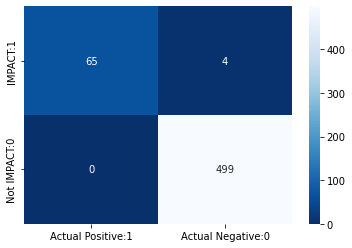

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# predict labels for test set
y_pred = svm_model.predict(test_X)

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['IMPACT:1', 'Not IMPACT:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues_r')
plt.show()


In [17]:
# load the saved model from a file
svm_loaded = joblib.load('svm_model.joblib')


# select a range of rows from the test set
test_range = test_X[1:200]

# use the loaded model to make predictions on the selected range
y_pred_range = svm_loaded.predict(test_range)

# print the predicted labels
results_range = pd.DataFrame({'Target': y_test[1:200].reshape(-1), 'Predicted': y_pred_range})

# print the DataFrame
print(results_range)


FileNotFoundError: [Errno 2] No such file or directory: 'svm_model.joblib'

# 2- RF CLASSIFIER

In [18]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import joblib

# train the model on the training set
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(train_X, y_train.ravel())

# Evaluate model accuracy on train set
y_train_pred = rfc.predict(train_X)
accuracy_train = accuracy_score(y_train, y_train_pred)
print(f"Model accuracy on train set: {accuracy_train:.4f}")

# Save the trained rfc model
joblib.dump(rfc, 'rfc5_model.joblib')

Model accuracy on train set: 1.0000


['rfc5_model.joblib']

In [348]:
# evaluate model accuracy on validation set
y_val_pred = rfc.predict(val_X)
accuracy_val = accuracy_score(y_val, y_val_pred)
print(f"Model accuracy on validation set: {accuracy_val:.4f}")

Model accuracy on validation set: 0.9871


In [349]:
# Predict test set results
y_pred = rfc.predict(test_X)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy score: {accuracy:.4f}")

# Calculate and print classification metrics
report_rfc = classification_report(y_test, y_pred, digits=4)
print("rfc Classifier Metrics:\n", report_rfc)

Model accuracy score: 0.9921
rfc Classifier Metrics:
               precision    recall  f1-score   support

           0     0.9902    0.9573    0.9735       211
           1     0.9924    0.9983    0.9954      1181

    accuracy                         0.9921      1392
   macro avg     0.9913    0.9778    0.9844      1392
weighted avg     0.9921    0.9921    0.9920      1392



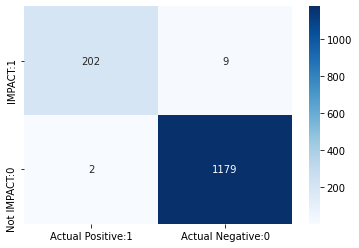

In [350]:
# visualize confusion matrix

cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['IMPACT:1', 'Not IMPACT:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')
plt.show()

In [351]:
# load the saved model from a file
rfc_loaded = joblib.load('rfc_model.joblib')

# select a range of rows from the test set
test_range = test_X[1:200]

# use the loaded model to make predictions on the selected range
y_pred_range = rfc_loaded.predict(test_range)

# print the predicted labels
results_range = pd.DataFrame({'Target': y_test[1:200].reshape(-1), 'Predicted': y_pred_range})

# print the DataFrame
print(results_range)


     Target  Predicted
0         1          1
1         1          1
2         1          1
3         1          1
4         1          1
..      ...        ...
194       1          1
195       1          1
196       0          1
197       1          1
198       0          1

[199 rows x 2 columns]


# 3- SGD CALSSIFIER

In [313]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import joblib

# Convert y_train and y_test from column vector to 1D array
y_train = y_train.ravel()
y_test = y_test.ravel()

# Train using SGDClassifier
sgd = SGDClassifier(loss='log', alpha=0.001, penalty='l2', max_iter=1000, random_state=42)

# Fit the model to the training set
sgd.fit(train_X, y_train)
y_pred = sgd.predict(test_X)

# Evaluate model accuracy on the training set
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy score: {accuracy:.4f}")

#save the model
joblib.dump(sgd, 'sgd_model.joblib')

Model accuracy score: 0.9447


['sgd_model.joblib']

In [314]:
# evaluate the model in the validation set
y_val_pred = sgd.predict(val_X)

# Evaluate model accuracy on validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
print(f"Model accuracy on validation set: {accuracy_val:.4f}")

Model accuracy on validation set: 0.9410


In [315]:
#evaluate the model in the test set
y_pred = sgd.predict(test_X)
# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy score: {accuracy:.4f}")

# Calculate and print classification metrics
report_sgd = classification_report(y_test, y_pred, digits=4)
print("SGD Classifier Metrics:\n", report_sgd)

Model accuracy score: 0.9447
SGD Classifier Metrics:
               precision    recall  f1-score   support

           0     0.8564    0.7630    0.8070       211
           1     0.9585    0.9771    0.9677      1181

    accuracy                         0.9447      1392
   macro avg     0.9074    0.8701    0.8874      1392
weighted avg     0.9430    0.9447    0.9434      1392



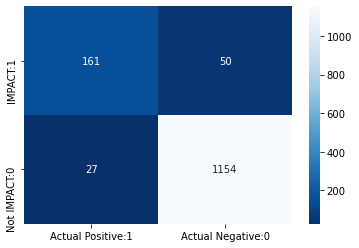

In [316]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# predict labels for test set
y_pred = sgd.predict(test_X)

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['IMPACT:1', 'Not IMPACT:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues_r')
plt.show()

In [317]:
# load the saved model from a file
sgd_loaded = joblib.load('sgd_model.joblib')

# select a range of rows from the test set
test_range = test_X[1:200]

# use the loaded model to make predictions on the selected range
y_pred_range = sgd_loaded.predict(test_range)

# print the predicted labels
results_range = pd.DataFrame({'Target': y_test[1:200].reshape(-1), 'Predicted': y_pred_range})

# print the DataFrame
print(results_range)

     Target  Predicted
0         1          1
1         1          1
2         1          1
3         1          1
4         1          1
..      ...        ...
194       1          1
195       1          0
196       0          0
197       1          1
198       0          0

[199 rows x 2 columns]


#   4-                           NAIVE BAYES 

In [318]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.naive_bayes import GaussianNB
import joblib

# Train Gaussian Naive Bayes classifier on selected features
gnb = GaussianNB()
gnb.fit(train_X, y_train)

#evaluate the model accuracy on train set
y_train_pred = gnb.predict(train_X)
accuracy_train = accuracy_score(y_train, y_train_pred)
print(f"Model accuracy on train set: {accuracy_train:.4f}")

# Save the trained gnb model
joblib.dump(gnb, 'gnb_model.joblib')

Model accuracy on train set: 0.9858


['gnb_model.joblib']

In [319]:
# evaluate the model in the validation set
y_val_pred = gnb.predict(val_X)
# Evaluate model accuracy on validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
print(f"Model accuracy on validation set: {accuracy_val:.4f}")

Model accuracy on validation set: 0.9842


In [320]:
#evaluate the model in the test set
y_pred = gnb.predict(test_X)
# Evaluate model accuracy on test set
gnb_accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy score: {gnb_accuracy:.4f}")
# Calculate and print classification metrics
report_gnb = classification_report(y_test, y_pred, digits=4)
print("Gaussian Naive Bayes Classifier Metrics:\n", report_gnb)

Model accuracy score: 0.9885
Gaussian Naive Bayes Classifier Metrics:
               precision    recall  f1-score   support

           0     0.9665    0.9573    0.9619       211
           1     0.9924    0.9941    0.9932      1181

    accuracy                         0.9885      1392
   macro avg     0.9794    0.9757    0.9776      1392
weighted avg     0.9885    0.9885    0.9885      1392



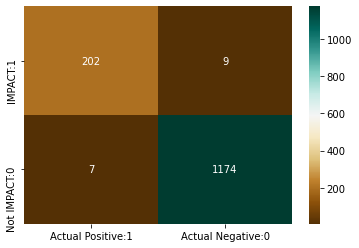

In [321]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# predict labels for test set
y_pred = gnb.predict(test_X)

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['IMPACT:1', 'Not IMPACT:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='BrBG')
plt.show()


In [322]:
# load the saved model from a file
gnb_loaded = joblib.load('gnb_model.joblib')


# select a range of rows from the test set
test_range = test_X[1:200]

# use the loaded model to make predictions on the selected range
y_pred_range = gnb_loaded.predict(test_range)

# print the predicted labels
results_range = pd.DataFrame({'Target': y_test[1:200].reshape(-1), 'Predicted': y_pred_range})

# print the DataFrame
print(results_range)


     Target  Predicted
0         1          1
1         1          1
2         1          1
3         1          1
4         1          1
..      ...        ...
194       1          1
195       1          1
196       0          1
197       1          1
198       0          0

[199 rows x 2 columns]


#  5- DECISION TREE

In [323]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Train decision tree classifier
dtc = DecisionTreeClassifier(random_state=0, max_depth=None,)
dtc.fit(train_X, y_train)

# evaluate the model accuracy on train set
y_train_pred = dtc.predict(train_X)
accuracy_train = accuracy_score(y_train, y_train_pred)
print(f"Model accuracy on train set: {accuracy_train:.4f}")

# Save the trained dtc model
joblib.dump(dtc, 'dtc_model.joblib')

Model accuracy on train set: 0.9999


['dtc_model.joblib']

In [324]:
# evaluate the model in the validation set
y_val_pred = dtc.predict(val_X)
# Evaluate model accuracy on validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
print(f"Model accuracy on validation set: {accuracy_val:.4f}")

Model accuracy on validation set: 0.9871


In [325]:
#evaluate the model in the test set
y_pred = dtc.predict(test_X)
# Evaluate model accuracy on test set
dtc_accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy score: {dtc_accuracy:.4f}")
# Calculate and print classification metrics
report_dtc = classification_report(y_test, y_pred, digits=4)
print("Decision Tree Classifier Metrics:\n", report_dtc)

Model accuracy score: 0.9892
Decision Tree Classifier Metrics:
               precision    recall  f1-score   support

           0     0.9667    0.9621    0.9644       211
           1     0.9932    0.9941    0.9937      1181

    accuracy                         0.9892      1392
   macro avg     0.9799    0.9781    0.9790      1392
weighted avg     0.9892    0.9892    0.9892      1392



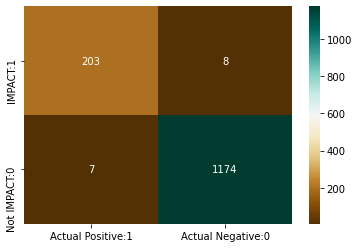

In [326]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# predict labels for test set
y_pred = dtc.predict(test_X)

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['IMPACT:1', 'Not IMPACT:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='BrBG')
plt.show()

In [327]:
# load the saved model from a file
dtc_loaded = joblib.load('dtc_model.joblib')

# select a range of rows from the test set
test_range = test_X[1:200]

# use the loaded model to make predictions on the selected range
y_pred_range = dtc_loaded.predict(test_range)

# print the predicted labels
results_range = pd.DataFrame({'Target': y_test[1:200].reshape(-1), 'Predicted': y_pred_range})

# print the DataFrame
print(results_range)


     Target  Predicted
0         1          1
1         1          1
2         1          1
3         1          1
4         1          1
..      ...        ...
194       1          1
195       1          1
196       0          1
197       1          1
198       0          0

[199 rows x 2 columns]


#  6- KNN CLASSIFIER 

In [328]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Train K-Nearest Neighbors Classifier on all features
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform',)
knn.fit(train_X, y_train)

# evaluate the model accuracy on train set
y_train_pred = knn.predict(train_X)
accuracy_train = accuracy_score(y_train, y_train_pred)
print(f"Model accuracy on train set: {accuracy_train:.4f}")
# Save the trained knn model
joblib.dump(knn, 'knn_model.joblib')

Model accuracy on train set: 0.9924


['knn_model.joblib']

In [329]:
# evaluate the model in the validation set
y_val_pred = knn.predict(val_X)
# Evaluate model accuracy on validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
print(f"Model accuracy on validation set: {accuracy_val:.4f}")

Model accuracy on validation set: 0.9871


In [330]:
#evaluate the model in the test set
y_pred = knn.predict(test_X)
# Evaluate model accuracy on test set
knn_accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy score: {knn_accuracy:.4f}")
# Calculate and print classification metrics
report_knn = classification_report(y_test, y_pred, digits=4)
print("K-Nearest Neighbors Classifier Metrics:\n", report_knn)

Model accuracy score: 0.9935
K-Nearest Neighbors Classifier Metrics:
               precision    recall  f1-score   support

           0     0.9856    0.9716    0.9785       211
           1     0.9949    0.9975    0.9962      1181

    accuracy                         0.9935      1392
   macro avg     0.9903    0.9845    0.9874      1392
weighted avg     0.9935    0.9935    0.9935      1392



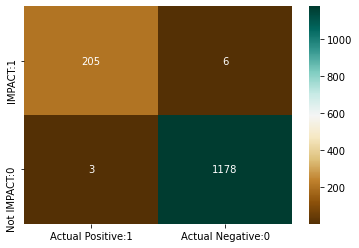

In [331]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['IMPACT:1', 'Not IMPACT:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='BrBG')
plt.show()

In [332]:
# load the saved model from a file
knn_loaded = joblib.load('knn_model.joblib')

# select a range of rows from the test set
test_range = test_X[1:200]

# use the loaded model to make predictions on the selected range
y_pred_range = knn_loaded.predict(test_range)

# print the predicted labels
results_range = pd.DataFrame({'Target': y_test[1:200].reshape(-1), 'Predicted': y_pred_range})

# print the DataFrame
print(results_range)


     Target  Predicted
0         1          1
1         1          1
2         1          1
3         1          1
4         1          1
..      ...        ...
194       1          1
195       1          1
196       0          0
197       1          1
198       0          0

[199 rows x 2 columns]


# 7- LR CLASSIFIER

In [333]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import joblib

lr = LogisticRegression(max_iter=10000, random_state=0, solver='lbfgs')

# Train and evaluate LR classifier with selected features
lr.fit(train_X, y_train.ravel())

# evaluate the model accuracy on train set
y_train_pred = lr.predict(train_X)
accuracy_train = accuracy_score(y_train, y_train_pred)
print(f"Model accuracy on train set: {accuracy_train:.4f}")
# Save the trained lr model
joblib.dump(lr, 'lr_model.joblib')

Model accuracy on train set: 0.9464


['lr_model.joblib']

In [334]:
# evaluate the model in the validation set
y_val_pred = lr.predict(val_X)
# Evaluate model accuracy on validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
print(f"Model accuracy on validation set: {accuracy_val:.4f}")

Model accuracy on validation set: 0.9439


In [335]:
#evaluate the model in the test set
y_pred = lr.predict(test_X)
# Evaluate model accuracy on test set
lr_accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy score: {lr_accuracy:.4f}")
# Calculate and print classification metrics
report_lr = classification_report(y_test, y_pred, digits=4)
print("Logistic Regression Classifier Metrics:\n", report_lr)

Model accuracy score: 0.9476
Logistic Regression Classifier Metrics:
               precision    recall  f1-score   support

           0     0.8632    0.7773    0.8180       211
           1     0.9609    0.9780    0.9694      1181

    accuracy                         0.9476      1392
   macro avg     0.9120    0.8776    0.8937      1392
weighted avg     0.9461    0.9476    0.9464      1392



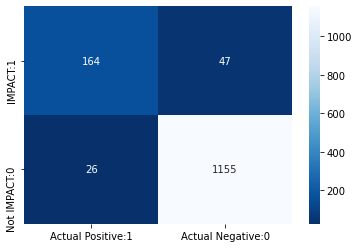

In [336]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# predict labels for test set
y_pred = lr.predict(test_X)

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['IMPACT:1', 'Not IMPACT:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues_r')
plt.show()

In [337]:
# load the saved model from a file
lr_loaded = joblib.load('lr_model.joblib')


# select a range of rows from the test set
test_range = test_X[1:200]

# use the loaded model to make predictions on the selected range
y_pred_range = lr_loaded.predict(test_range)

# print the predicted labels
results_range = pd.DataFrame({'Target': y_test[1:200].reshape(-1), 'Predicted': y_pred_range})

# print the DataFrame
print(results_range)


     Target  Predicted
0         1          1
1         1          1
2         1          1
3         1          1
4         1          1
..      ...        ...
194       1          1
195       1          0
196       0          0
197       1          1
198       0          0

[199 rows x 2 columns]


# 8- GRADIENT BOOSTING

In [338]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Train gradient boosting classifier
gb_clf = GradientBoostingClassifier(random_state=0, max_depth=5, n_estimators=1000, learning_rate=0.1)
gb_clf.fit(train_X, y_train)

# evaluate the model accuracy on train set
y_train_pred = gb_clf.predict(train_X)
accuracy_train = accuracy_score(y_train, y_train_pred)
print(f"Model accuracy on train set: {accuracy_train:.4f}")
# Save the trained gb_clf model
joblib.dump(gb_clf, 'gb_clf_model.joblib')

Model accuracy on train set: 0.9999


['gb_clf_model.joblib']

In [339]:
# evaluate the model in the validation set
y_val_pred = gb_clf.predict(val_X)
# Evaluate model accuracy on validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
print(f"Model accuracy on validation set: {accuracy_val:.4f}")

Model accuracy on validation set: 0.9892


In [340]:
#evaluate the model in the test set
y_pred = gb_clf.predict(test_X)
# Evaluate model accuracy on test set
gb_clf_accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy score: {gb_clf_accuracy:.4f}")
# Calculate and print classification metrics
report_gb_clf = classification_report(y_test, y_pred, digits=4)
print("Gradient Boosting Classifier Metrics:\n", report_gb_clf)

Model accuracy score: 0.9921
Gradient Boosting Classifier Metrics:
               precision    recall  f1-score   support

           0     0.9854    0.9621    0.9736       211
           1     0.9933    0.9975    0.9954      1181

    accuracy                         0.9921      1392
   macro avg     0.9893    0.9798    0.9845      1392
weighted avg     0.9921    0.9921    0.9921      1392



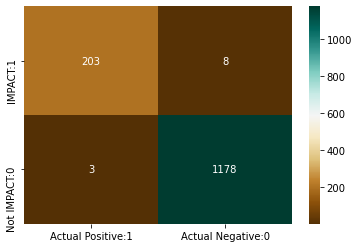

In [341]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# predict labels for test set
y_pred = gb_clf.predict(test_X)

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['IMPACT:1', 'Not IMPACT:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='BrBG')
plt.show()

In [342]:
from sklearn.ensemble import GradientBoostingClassifier
import joblib
import pandas as pd

# load the saved model from a file
gb_loaded = joblib.load('gb_model.joblib')


# select a range of rows from the test set
test_range = test_X[1:200]

# use the loaded model to make predictions on the selected range
y_pred_range = gb_loaded.predict(test_range)

# print the predicted labels
results_range = pd.DataFrame({'Target': y_test[1:200].reshape(-1), 'Predicted': y_pred_range})

# print the DataFrame
print(results_range)

     Target  Predicted
0         1          1
1         1          1
2         1          1
3         1          1
4         1          1
..      ...        ...
194       1          1
195       1          1
196       0          0
197       1          1
198       0          1

[199 rows x 2 columns]


# CONFUSION METRIX OF ALL THE ALGORITHMS 

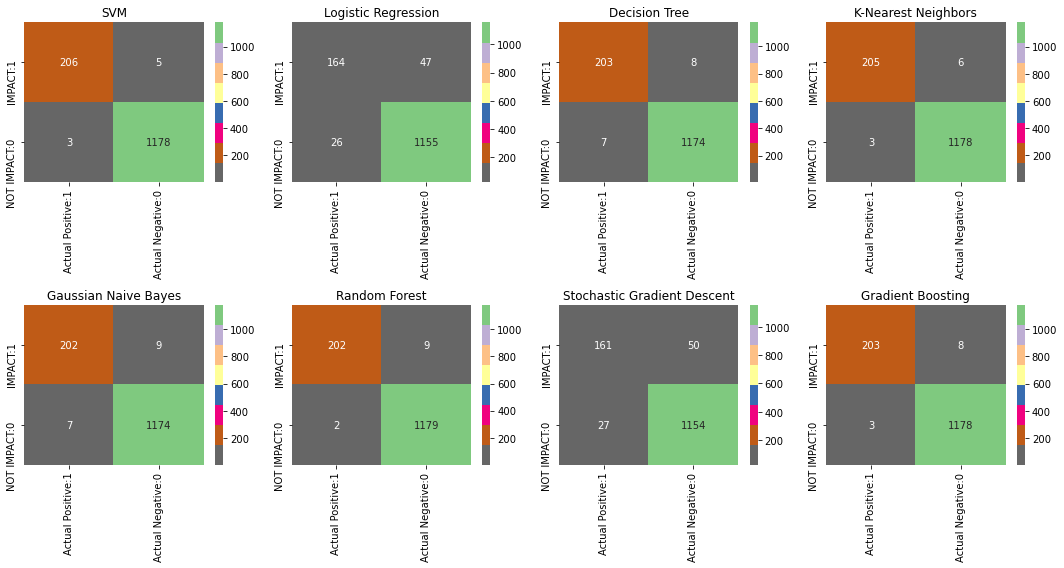

In [343]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

classifiers = [("SVM", svm_model), ("Logistic Regression", lr), ("Decision Tree", dtc), 
               ("K-Nearest Neighbors", knn), ("Gaussian Naive Bayes", gnb),
               ("Random Forest", rfc), ("Stochastic Gradient Descent", sgd),
               ("Gradient Boosting", gb_clf)]

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))

for i, ax in enumerate(axs.flat):
    if i < len(classifiers):
        clf_name, clf = classifiers[i]
        clf.fit(train_X, y_train)  # Fit the classifier with the training data
        y_pred = clf.predict(test_X)
        cm = confusion_matrix(y_test, y_pred)
        cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['IMPACT:1', 'NOT IMPACT:0'])
        sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Accent_r', ax=ax)
        ax.set_title(clf_name)
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()


# ROC_AUC SCORE METRIC

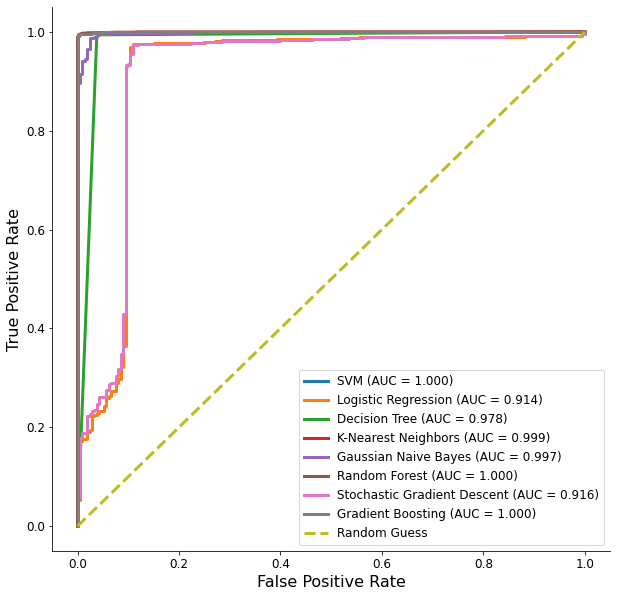

In [344]:
from sklearn.metrics import roc_curve, roc_auc_score

classifiers = [("SVM", svm_model), ("Logistic Regression", lr), ("Decision Tree", dtc), ("K-Nearest Neighbors", knn), ("Gaussian Naive Bayes", gnb), ("Random Forest", rfc), ("Stochastic Gradient Descent", sgd), ("Gradient Boosting", gb_clf)]

fig, ax = plt.subplots(figsize=(10, 10))

for clf_name, clf in classifiers:
    if hasattr(clf, "predict_proba"):
        y_pred_proba = clf.predict_proba(test_X)[:, 1]
    else:
        y_pred_proba = clf.decision_function(test_X)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    ax.plot(fpr, tpr, label=f"{clf_name} (AUC = {auc:.3f})", linewidth=3)

ax.plot([0, 1], [0, 1], linestyle='--', label='Random Guess', linewidth=3)
ax.set_xlabel('False Positive Rate', fontsize=16)
ax.set_ylabel('True Positive Rate', fontsize=16)
ax.legend(fontsize=14)

# Increase the size of numerical values on x and y axes
ax.tick_params(axis='both', labelsize=12)

# Increase the size of the legend
legend = ax.legend(fontsize=12)

# Remove right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(False)

# Save the figure as PDF with higher DPI for better quality
plt.savefig('figure6.pdf', format='pdf', dpi=1200)

plt.show()


# ALGORIHM' PARAMETERS USED 

In [345]:
import pandas as pd

classifiers = [("SVM", svm_model, {'C': 1.0, 'kernel': 'rbf', 'gamma': 'scale'}),
               ("Logistic Regression", lr, {'C': 1.0, 'solver': 'lbfgs'}),
               ("Decision Tree", dtc, {'criterion': 'gini', 'max_depth': None}),
               ("K-Nearest Neighbors", knn, {'n_neighbors': 5, 'weights': 'uniform'}),
               ("Gaussian Naive Bayes", gnb, {}),
               ("Random Forest", rfc, {'n_estimators': 100, 'criterion': 'gini'}),
               ("Stochastic Gradient Descent", sgd, {'alpha': 0.0001, 'max_iter': 1000}),
               ("Gradient Boosting", gb_clf, {'n_estimators': 100, 'learning_rate': 0.1})]

# Create an empty DataFrame to store the parameters
parameters_df = pd.DataFrame(columns=['Algorithm', 'Parameters'])

# Iterate over the classifiers and extract the parameters
for clf_name, clf, params in classifiers:
    parameters_df = parameters_df.append({'Algorithm': clf_name, 'Parameters': params}, ignore_index=True)

# Display the parameters DataFrame
display(parameters_df)

#give a table of the parameters for each model
table = pd.DataFrame(columns=['Algorithm', 'Parameters'])
for clf_name, clf, params in classifiers:
    table = table.append({'Algorithm': clf_name, 'Parameters': params}, ignore_index=True)
display(table)


,Algorithm,Parameters
0,SVM,"{'C': 1.0, 'kernel': 'rbf', 'gamma': 'scale'}"
1,Logistic Regression,"{'C': 1.0, 'solver': 'lbfgs'}"
2,Decision Tree,"{'criterion': 'gini', 'max_depth': None}"
3,K-Nearest Neighbors,"{'n_neighbors': 5, 'weights': 'uniform'}"
4,Gaussian Naive Bayes,{}
5,Random Forest,"{'n_estimators': 100, 'criterion': 'gini'}"
6,Stochastic Gradient Descent,"{'alpha': 0.0001, 'max_iter': 1000}"
7,Gradient Boosting,"{'n_estimators': 100, 'learning_rate': 0.1}"


,Algorithm,Parameters
0,SVM,"{'C': 1.0, 'kernel': 'rbf', 'gamma': 'scale'}"
1,Logistic Regression,"{'C': 1.0, 'solver': 'lbfgs'}"
2,Decision Tree,"{'criterion': 'gini', 'max_depth': None}"
3,K-Nearest Neighbors,"{'n_neighbors': 5, 'weights': 'uniform'}"
4,Gaussian Naive Bayes,{}
5,Random Forest,"{'n_estimators': 100, 'criterion': 'gini'}"
6,Stochastic Gradient Descent,"{'alpha': 0.0001, 'max_iter': 1000}"
7,Gradient Boosting,"{'n_estimators': 100, 'learning_rate': 0.1}"


# MODEL TRAINING TIME 

In [346]:
import time

classifiers = [("SVM", svm_model), ("Logistic Regression", lr), ("Decision Tree", dtc),
               ("K-Nearest Neighbors", knn), ("Gaussian Naive Bayes", gnb),
               ("Random Forest", rfc), ("Stochastic Gradient Descent", sgd),
               ("Gradient Boosting", gb_clf)]

# Create an empty DataFrame to store the training times
training_time_df = pd.DataFrame(columns=['Algorithm', 'Training Time'])

# Iterate over the classifiers and measure the training time
for clf_name, clf in classifiers:
    start_time = time.time()
    clf.fit(train_X, y_train)
    end_time = time.time()
    training_time = end_time - start_time
    training_time_df = training_time_df.append({'Algorithm': clf_name, 'Training Time': training_time}, ignore_index=True)

# Display the training time DataFrame
display(training_time_df)


,Algorithm,Training Time
0,SVM,0.074924
1,Logistic Regression,0.012930
2,Decision Tree,0.031232
3,K-Nearest Neighbors,0.006551
4,Gaussian Naive Bayes,0.001999
5,Random Forest,0.637380
6,Stochastic Gradient Descent,0.006854
7,Gradient Boosting,14.269353


#  MODEL' TIME INFERENCE

In [347]:
import time

classifiers = [("SVM", svm_model), ("Logistic Regression", lr), ("Decision Tree", dtc),
               ("K-Nearest Neighbors", knn), ("Gaussian Naive Bayes", gnb),
               ("Random Forest", rfc), ("Stochastic Gradient Descent", sgd),
               ("Gradient Boosting", gb_clf)]

# Create an empty DataFrame to store the inference times
inference_time_df = pd.DataFrame(columns=['Algorithm', 'Inference Time'])

# Iterate over the classifiers and measure the inference time
for clf_name, clf in classifiers:
    start_time = time.time()
    clf.predict(test_X)
    end_time = time.time()
    inference_time = end_time - start_time
    inference_time_df = inference_time_df.append({'Algorithm': clf_name, 'Inference Time': inference_time}, ignore_index=True)

# Display the inference time DataFrame
display(inference_time_df)


,Algorithm,Inference Time
0,SVM,0.004003
1,Logistic Regression,0.000000
2,Decision Tree,0.000000
3,K-Nearest Neighbors,0.020053
4,Gaussian Naive Bayes,0.000000
5,Random Forest,0.010033
6,Stochastic Gradient Descent,0.000000
7,Gradient Boosting,0.017604


# KNN

In [16]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

# Load the dataset from the specified path
data_path = r"C:\Users\ytkoffi\Desktop\METHOD2SMV\POSEDATA_SMV\S5\data51.csv"
data = pd.read_csv(data_path)

# Assuming the last column is the label
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Label

# Split the dataset into training + validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StratifiedKFold object
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Define KNN model and parameters for GridSearch
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=skf, scoring='accuracy', n_jobs=-1)

# Initialize lists to hold accuracy and F1 scores
train_accuracies = []
val_accuracies = []
train_f1_scores = []
val_f1_scores = []

# Perform Stratified K-Fold Cross Validation with GridSearch
for fold, (train_index, val_index) in enumerate(skf.split(X_train_val, y_train_val)):
    X_train, X_val = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
    y_train, y_val = y_train_val.iloc[train_index], y_train_val.iloc[val_index]

    # Fit the GridSearchCV object
    grid_search.fit(X_train, y_train)
    
    # Best model
    best_knn = grid_search.best_estimator_

    # Calculate training accuracy and F1 score
    y_train_pred = best_knn.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    train_accuracies.append(train_accuracy)
    train_f1_scores.append(train_f1)
    
    # Make predictions and calculate validation accuracy and F1 score
    y_val_pred = best_knn.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')
    val_accuracies.append(val_accuracy)
    val_f1_scores.append(val_f1)
    
    # Print training and validation accuracy and F1 score for the current fold
    print(f'Fold {fold + 1} Training Accuracy: {train_accuracy:.4f}, F1 Score: {train_f1:.4f}')
    print(f'Fold {fold + 1} Validation Accuracy: {val_accuracy:.4f}, F1 Score: {val_f1:.4f}')

# Calculate average accuracies and F1 scores
average_train_accuracy = np.mean(train_accuracies)
average_val_accuracy = np.mean(val_accuracies)
average_train_f1 = np.mean(train_f1_scores)
average_val_f1 = np.mean(val_f1_scores)

# Print average accuracies and F1 scores
print(f'Average Training Accuracy for KNN: {average_train_accuracy:.4f}, F1 Score: {average_train_f1:.4f}')
print(f'Average Validation Accuracy for KNN: {average_val_accuracy:.4f}, F1 Score: {average_val_f1:.4f}')

# Evaluate the best model on the test set
best_knn = grid_search.best_estimator_
y_test_pred = best_knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print test accuracy and F1 score
print(f'Test Accuracy for KNN: {test_accuracy:.4f}, F1 Score: {test_f1:.4f}')


Fold 1 Training Accuracy: 0.9989, F1 Score: 0.9989
Fold 1 Validation Accuracy: 0.7769, F1 Score: 0.7637
Fold 2 Training Accuracy: 0.9987, F1 Score: 0.9987
Fold 2 Validation Accuracy: 0.7543, F1 Score: 0.7496
Fold 3 Training Accuracy: 0.9989, F1 Score: 0.9989
Fold 3 Validation Accuracy: 0.7648, F1 Score: 0.7539
Fold 4 Training Accuracy: 0.9996, F1 Score: 0.9996
Fold 4 Validation Accuracy: 0.7535, F1 Score: 0.7441
Fold 5 Training Accuracy: 0.9991, F1 Score: 0.9991
Fold 5 Validation Accuracy: 0.7628, F1 Score: 0.7562
Average Training Accuracy for KNN: 0.9990, F1 Score: 0.9990
Average Validation Accuracy for KNN: 0.7625, F1 Score: 0.7535
Test Accuracy for KNN: 0.7333, F1 Score: 0.7230


# SVM

In [20]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

# Load the dataset from the specified path
data_path = r"C:\Users\ytkoffi\Desktop\METHOD2SMV\POSEDATA_SMV\S5\data511.csv"
data = pd.read_csv(data_path)

# Assuming the last column is the label
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Label

# Split the dataset into training + validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StratifiedKFold object
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Define SVM model and parameters for GridSearch
svm = SVC(random_state=42)
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']  # Only applicable for 'rbf' and 'poly'
}
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=skf, scoring='accuracy', n_jobs=-1)

# Initialize lists to hold accuracy and F1 scores
train_accuracies = []
val_accuracies = []
train_f1_scores = []
val_f1_scores = []

# Perform Stratified K-Fold Cross Validation with GridSearch
for fold, (train_index, val_index) in enumerate(skf.split(X_train_val, y_train_val)):
    X_train, X_val = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
    y_train, y_val = y_train_val.iloc[train_index], y_train_val.iloc[val_index]

    # Fit the GridSearchCV object
    grid_search.fit(X_train, y_train)
    
    # Best model
    best_svm = grid_search.best_estimator_

    # Calculate training accuracy and F1 score
    y_train_pred = best_svm.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    train_accuracies.append(train_accuracy)
    train_f1_scores.append(train_f1)
    
    # Make predictions and calculate validation accuracy and F1 score
    y_val_pred = best_svm.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')
    val_accuracies.append(val_accuracy)
    val_f1_scores.append(val_f1)
    
    # Print training and validation accuracy and F1 score for the current fold
    print(f'Fold {fold + 1} Training Accuracy: {train_accuracy:.4f}, F1 Score: {train_f1:.4f}')
    print(f'Fold {fold + 1} Validation Accuracy: {val_accuracy:.4f}, F1 Score: {val_f1:.4f}')

# Calculate average accuracies and F1 scores
average_train_accuracy = np.mean(train_accuracies)
average_val_accuracy = np.mean(val_accuracies)
average_train_f1 = np.mean(train_f1_scores)
average_val_f1 = np.mean(val_f1_scores)

# Print average accuracies and F1 scores
print(f'Average Training Accuracy for SVM: {average_train_accuracy:.4f}, F1 Score: {average_train_f1:.4f}')
print(f'Average Validation Accuracy for SVM: {average_val_accuracy:.4f}, F1 Score: {average_val_f1:.4f}')

# Evaluate the best model on the test set
best_svm = grid_search.best_estimator_
y_test_pred = best_svm.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print test accuracy and F1 score
print(f'Test Accuracy for SVM: {test_accuracy:.4f}, F1 Score: {test_f1:.4f}')


Fold 1 Training Accuracy: 0.7020, F1 Score: 0.5959
Fold 1 Validation Accuracy: 0.6979, F1 Score: 0.5907
Fold 2 Training Accuracy: 0.6992, F1 Score: 0.5883
Fold 2 Validation Accuracy: 0.7031, F1 Score: 0.5958
Fold 3 Training Accuracy: 0.7035, F1 Score: 0.5973
Fold 3 Validation Accuracy: 0.6936, F1 Score: 0.5792
Fold 4 Training Accuracy: 0.6987, F1 Score: 0.5866
Fold 4 Validation Accuracy: 0.6997, F1 Score: 0.5897
Fold 5 Training Accuracy: 0.7003, F1 Score: 0.5909
Fold 5 Validation Accuracy: 0.7037, F1 Score: 0.5966
Average Training Accuracy for SVM: 0.7007, F1 Score: 0.5918
Average Validation Accuracy for SVM: 0.6996, F1 Score: 0.5904
Test Accuracy for SVM: 0.6958, F1 Score: 0.5831


# MLP

In [19]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

# Load the dataset from the specified path
data_path = r"C:\Users\ytkoffi\Desktop\METHOD2SMV\POSEDATA_SMV\S5\data51.csv"
data = pd.read_csv(data_path)

# Assuming the last column is the label
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Label

# Split the dataset into training + validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StratifiedKFold object
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Define MLP model and parameters for GridSearch
mlp = MLPClassifier(max_iter=500, random_state=42)
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd']
}
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=skf, scoring='accuracy', n_jobs=-1)

# Initialize lists to hold accuracy and F1 scores
train_accuracies = []
val_accuracies = []
train_f1_scores = []
val_f1_scores = []

# Perform Stratified K-Fold Cross Validation with GridSearch
for fold, (train_index, val_index) in enumerate(skf.split(X_train_val, y_train_val)):
    X_train, X_val = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
    y_train, y_val = y_train_val.iloc[train_index], y_train_val.iloc[val_index]

    # Fit the GridSearchCV object
    grid_search.fit(X_train, y_train)
    
    # Best model
    best_mlp = grid_search.best_estimator_

    # Calculate training accuracy and F1 score
    y_train_pred = best_mlp.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    train_accuracies.append(train_accuracy)
    train_f1_scores.append(train_f1)
    
    # Make predictions and calculate validation accuracy and F1 score
    y_val_pred = best_mlp.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')
    val_accuracies.append(val_accuracy)
    val_f1_scores.append(val_f1)
    
    # Print training and validation accuracy and F1 score for the current fold
    print(f'Fold {fold + 1} Training Accuracy: {train_accuracy:.4f}, F1 Score: {train_f1:.4f}')
    print(f'Fold {fold + 1} Validation Accuracy: {val_accuracy:.4f}, F1 Score: {val_f1:.4f}')

# Calculate average accuracies and F1 scores
average_train_accuracy = np.mean(train_accuracies)
average_val_accuracy = np.mean(val_accuracies)
average_train_f1 = np.mean(train_f1_scores)
average_val_f1 = np.mean(val_f1_scores)

# Print average accuracies and F1 scores
print(f'Average Training Accuracy for MLP: {average_train_accuracy:.4f}, F1 Score: {average_train_f1:.4f}')
print(f'Average Validation Accuracy for MLP: {average_val_accuracy:.4f}, F1 Score: {average_val_f1:.4f}')

# Evaluate the best model on the test set
best_mlp = grid_search.best_estimator_
y_test_pred = best_mlp.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print test accuracy and F1 score
print(f'Test Accuracy for MLP: {test_accuracy:.4f}, F1 Score: {test_f1:.4f}')


Fold 1 Training Accuracy: 0.6979, F1 Score: 0.5795
Fold 1 Validation Accuracy: 0.6962, F1 Score: 0.5741
Fold 2 Training Accuracy: 0.6994, F1 Score: 0.5995
Fold 2 Validation Accuracy: 0.6962, F1 Score: 0.6013
Fold 3 Training Accuracy: 0.6942, F1 Score: 0.5688
Fold 3 Validation Accuracy: 0.6944, F1 Score: 0.5692
Fold 4 Training Accuracy: 0.6987, F1 Score: 0.5824
Fold 4 Validation Accuracy: 0.7031, F1 Score: 0.5905
Fold 5 Training Accuracy: 0.6992, F1 Score: 0.5857
Fold 5 Validation Accuracy: 0.6950, F1 Score: 0.5816
Average Training Accuracy for MLP: 0.6979, F1 Score: 0.5832
Average Validation Accuracy for MLP: 0.6970, F1 Score: 0.5833
Test Accuracy for MLP: 0.6694, F1 Score: 0.5510


In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, Model, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy
from sklearn.model_selection import train_test_split

# Specify the paths to the skeleton and accelerometer data folders
skeleton_path = r"C:\Users\ytkoffi\Desktop\KD\test\skel"
accelerometer_path = r"C:\Users\ytkoffi\Desktop\KD\test\accel"

# Load Skeleton Data from CSV
def load_skeleton_data(skel_dir):
    X_path = os.path.join(skel_dir, 'skel_X.csv')
    Y_path = os.path.join(skel_dir, 'skel_Y.csv')
    
    if not os.path.isfile(X_path) or not os.path.isfile(Y_path):
        raise FileNotFoundError("Skeleton data files not found.")

    skel_X = pd.read_csv(X_path)
    skel_Y = pd.read_csv(Y_path)
    
    return skel_X, skel_Y

# Load Accelerometer Data from CSV
def load_accelerometer_data(accel_dir):
    accel_X_path = os.path.join(accel_dir, 'acc_X.csv')
    accel_Y_path = os.path.join(accel_dir, 'acc_Y.csv')
    
    if not os.path.isfile(accel_X_path) or not os.path.isfile(accel_Y_path):
        raise FileNotFoundError("Accelerometer data files not found.")

    accel_X = pd.read_csv(accel_X_path).values
    accel_Y = pd.read_csv(accel_Y_path).values
    
    return accel_X, accel_Y

# Load and preprocess data
skel_X, skel_Y = load_skeleton_data(skeleton_path)
accelerometer_X, accelerometer_Y = load_accelerometer_data(accelerometer_path)

# Print shapes of loaded data
print("Shape of skeleton data (X):", skel_X.shape)
print("Shape of skeleton labels (Y):", skel_Y.shape)
print("Shape of accelerometer data (X):", accelerometer_X.shape)
print("Shape of accelerometer labels (Y):", accelerometer_Y.shape)

# Preprocess data
num_joints = 33
num_coordinates = 3
num_frames = skel_X.shape[0]

joint_columns = [f'Joint{i}_{axis}' for i in range(1, num_joints + 1) for axis in ['X', 'Y', 'Z']]
joint_data = skel_X[joint_columns].values
skeleton_reshaped = joint_data.reshape((num_frames, num_joints, num_coordinates))
accelerometer_X = accelerometer_X.reshape(accelerometer_X.shape[0], accelerometer_X.shape[1], 1)
skel_Y = skel_Y.values.flatten()

print("Shape of reshaped skeleton data:", skeleton_reshaped.shape)
# print("Shape of reshaped accelerometer data:", accelerometer_X.shape)
# print("Shape of labels:", skel_Y.shape)

# Define Hypergraph Class
class HyperGraph:
    def __init__(self, num_joints, num_hyperedges):
        self.num_joints = num_joints
        self.hyperedges = num_hyperedges
        self.incidence_matrix = self.create_incidence_matrix()
        self.L = self.create_laplacian_matrix()

    def create_incidence_matrix(self):
        incidence_matrix = np.zeros((self.num_joints, len(self.hyperedges)))
        for i, hyperedge in enumerate(self.hyperedges):
            for joint in hyperedge:
                incidence_matrix[joint, i] = 1
        return incidence_matrix

    def normalize(self, matrix):
        row_sum = np.array(matrix.sum(axis=1))
        r_inv = np.where(row_sum == 0, 0, 1 / row_sum)
        r_mat_inv = np.diag(r_inv)
        normalized_matrix = r_mat_inv @ matrix
        return normalized_matrix

    def create_laplacian_matrix(self):
        H = self.incidence_matrix
        D_e = np.diag(np.sum(H, axis=0))
        D_v = np.diag(np.sum(H, axis=1))
        H_normalized = self.normalize(H)
        D_e_inv = np.zeros(D_e.shape)
        non_zero_indices = np.diag(D_e) != 0
        D_e_inv[non_zero_indices, non_zero_indices] = 1 / D_e[non_zero_indices, non_zero_indices]
        L = np.dot(H_normalized, D_e_inv).dot(H_normalized.T) - D_v
        return L

# Define Hyperedges
hyperedges = [
    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],  # Head and neck
    [12, 14, 16, 18, 20, 22],  # Left arm
    [11, 13, 15, 17, 19, 21],  # Right arm
    [11, 12, 23, 24],  # Torso
    [24, 26, 28, 30, 32],  # Left leg
    [25, 27, 29, 31],  # Right leg
]

# Initialize the hypergraph
hypergraph = HyperGraph(num_joints=num_joints, num_hyperedges=hyperedges)

# HGCN Layer
class HGCNLayer(tf.keras.layers.Layer):
    def __init__(self, units, activation='relu'):
        super(HGCNLayer, self).__init__()
        self.units = units
        self.activation = tf.keras.activations.get(activation)

    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.units),
                                 initializer='glorot_uniform',
                                 name='kernel')
        self.b = self.add_weight(shape=(self.units,),
                                 initializer='zeros',
                                 name='bias')

    def call(self, inputs):
        x = tf.matmul(tf.constant(hypergraph.L, dtype=tf.float32), inputs)
        x = tf.matmul(x, self.w) + self.b
        return self.activation(x)

# Model components
def create_hgcn_teacher():
    inputs = layers.Input(shape=(num_joints, num_coordinates))
    x = HGCNLayer(64)(inputs)
    x = HGCNLayer(64)(x)
    model = Model(inputs, x)
    return model

def create_cnn_teacher():
    inputs = layers.Input(shape=(accelerometer_X.shape[1], 1))
    x = layers.Conv1D(64, kernel_size=3, padding='same', activation='relu')(inputs)
    x = layers.MaxPooling1D(pool_size=2)(x)
    x = layers.Conv1D(64, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.MaxPooling1D(pool_size=2)(x)
    x = layers.Flatten()(x)
    model = Model(inputs, x)
    return model

def create_teacher_model():
    skeleton_input = layers.Input(shape=(num_joints, num_coordinates))
    accel_input = layers.Input(shape=(accelerometer_X.shape[1], 1))
    
    hgcn_model = create_hgcn_teacher()
    cnn_model = create_cnn_teacher()
    
    skeleton_features = hgcn_model(skeleton_input)
    accel_features = cnn_model(accel_input)
    
    combined_features = layers.Concatenate()([layers.Flatten()(skeleton_features), accel_features])
    x = layers.Dense(128, activation='relu')(combined_features)
    x = layers.Reshape((1, 128))(x)
    x = layers.LSTM(128)(x)
    output = layers.Dense(1, activation='sigmoid')(x)
    print("shape of output for the teacher:", output.shape)
    
    model = Model(inputs=[skeleton_input, accel_input], outputs=output)
    return model

def create_hgcn_student():
    inputs = layers.Input(shape=(num_joints, num_coordinates))
    x = HGCNLayer(32)(inputs)
    model = Model(inputs, x)
    return model

def create_cnn_student():
    inputs = layers.Input(shape=(accelerometer_X.shape[1], 1))
    x = layers.Conv1D(32, kernel_size=3, padding='same', activation='relu')(inputs)
    x = layers.MaxPooling1D(pool_size=2)(x)
    x = layers.Flatten()(x)
    model = Model(inputs, x)
    return model

def create_student_model():
    skeleton_input = layers.Input(shape=(num_joints, num_coordinates))
    accel_input = layers.Input(shape=(accelerometer_X.shape[1], 1))
    
    hgcn_model = create_hgcn_student()
    cnn_model = create_cnn_student()
    
    skeleton_features = hgcn_model(skeleton_input)
    accel_features = cnn_model(accel_input)
    
    combined = layers.Concatenate()([layers.Flatten()(skeleton_features), accel_features])
    x = layers.Dense(64, activation='relu')(combined)
    x = layers.Reshape((1, 64))(x)
    x = layers.LSTM(64)(x)
    output = layers.Dense(1, activation='sigmoid')(x)
    print("shape of output for the student:", output.shape)
    
    model = Model(inputs=[skeleton_input, accel_input], outputs=output)
    return model

# Knowledge distillation loss
def knowledge_distillation_loss(alpha=0.5, temperature=3):
    bce = BinaryCrossentropy()
    
    def loss(y_true, y_pred):
        y_true_binary, y_soft = y_true[:, 0], y_true[:, 1]
        hard_loss = bce(y_true_binary, y_pred)
        teacher_soft = tf.nn.sigmoid(y_soft / temperature)
        student_soft = tf.nn.sigmoid(y_pred / temperature)
        soft_loss = BinaryCrossentropy()(teacher_soft, student_soft)
        return alpha * hard_loss + (1 - alpha) * soft_loss * (temperature ** 2)
    
    return loss

# Training function
def train_model(model, x_skel_train, x_acc_train, y_train, x_skel_val, x_acc_val, y_val, soft_labels=None, epochs=300, batch_size=32):
    early_stopping = EarlyStopping(patience=20, restore_best_weights=True)
    lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=10)
    
    if soft_labels is not None:
        y_train_combined = np.column_stack((y_train, soft_labels))
        y_val_combined = np.column_stack((y_val, model.predict([x_skel_val, x_acc_val])))
    else:
        y_train_combined = y_train
        y_val_combined = y_val
    
    history = model.fit(
        [x_skel_train, x_acc_train], y_train_combined,
        validation_data=([x_skel_val, x_acc_val], y_val_combined),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[early_stopping, lr_scheduler]
    )
    return history

# Evaluation function
def evaluate_model(model, x_skel, x_acc, y_true):
    predictions = model.predict([x_skel, x_acc])
    loss = BinaryCrossentropy()(y_true, predictions)
    accuracy = BinaryAccuracy()(y_true, predictions)
    return loss.numpy(), accuracy.numpy()

# Split data
X_skel_train, X_skel_val, X_acc_train, X_acc_val, y_train, y_val = train_test_split(
    skeleton_reshaped, accelerometer_X, skel_Y, test_size=0.2, random_state=42
)

# Train teacher model
teacher_model = create_teacher_model()
teacher_model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
                      loss=BinaryCrossentropy(),
                      metrics=[BinaryAccuracy()])
teacher_history = train_model(teacher_model, X_skel_train, X_acc_train, y_train, X_skel_val, X_acc_val, y_val)

# Get soft labels from teacher
soft_labels_train = teacher_model.predict([X_skel_train, X_acc_train])

# Train student model
student_model = create_student_model()
student_model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
                      loss=knowledge_distillation_loss(),
                      metrics=[BinaryAccuracy()])
student_history = train_model(student_model, X_skel_train, X_acc_train, y_train, 
                              X_skel_val, X_acc_val, y_val, soft_labels=soft_labels_train)

# Plotting
# plt.figure(figsize=(12, 5))
# plt.subplot(1, 2, 1)
# plt.plot(teacher_history.history['loss'], label='Teacher Train')
# plt.plot(teacher_history.history['val_loss'], label='Teacher Val')
# plt.plot(student_history.history['loss'], label='Student Train')
# plt.plot(student_history.history['val_loss'], label='Student Val')
# plt.title('Model Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()

# plt.subplot(1, 2, 2)
# plt.plot(teacher_history.history['binary_accuracy'], label='Teacher Train')
# plt.plot(teacher_history.history['val_binary_accuracy'], label='Teacher Val')
# plt.plot(student_history.history['binary_accuracy'], label='Student Train')
# plt.plot(student_history.history['val_binary_accuracy'], label='Student Val')
# plt.title('Model Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()

# plt.tight_layout()
# plt.show()

# # Evaluation
# teacher_val_loss, teacher_val_acc = evaluate_model(teacher_model, X_skel_val, X_acc_val, y_val)
# student_val_loss, student_val_acc = evaluate_model(student_model, X_skel_val, X_acc_val, y_val)

# print(f"Teacher Model - Validation Loss: {teacher_val_loss:.4f}, Validation Accuracy: {teacher_val_acc:.4f}")
# print(f"Student Model - Validation Loss: {student_val_loss:.4f}, Validation Accuracy: {student_val_acc:.4f}")